In [1]:
!pip3 install /home/Xuan/LGE_project/git_rewriten/Python_read_Siemens_rawdata/brightness_correction/dist/brightness_correction-0.4.tar.gz

Processing ./Python_read_Siemens_rawdata/brightness_correction/dist/brightness_correction-0.4.tar.gz
  Created wheel for brightness-correction: filename=brightness_correction-0.4-py3-none-any.whl size=17232 sha256=5e836fe1bd6d34de03365a49a73f66dcd3c0b1773f1c5821bbd55498f1cbb4de
  Stored in directory: /home/Xuan/.cache/pip/wheels/c8/91/32/5e25365b3f33e622c397eec4ad570f1986f652e8df0da15418
Successfully built brightness-correction
  Attempting uninstall: brightness-correction
    Found existing installation: brightness-correction 0.4
    Uninstalling brightness-correction-0.4:
      Successfully uninstalled brightness-correction-0.4


In [2]:
from brightness_correction.brightness_correction import getting_and_saving_correction_map, create_and_start_threadings, displaying_results
base_dir = "/home/Xuan/LGE_project"
input_folder = "rawdata"
output_folder = "test_correction_map_auto_orientation"
input_folder_names = ['777'] #if you set it to None, it will use all the folders in the input_folder

please read README.md to run the code.
The code is still under development.
support data shape: 
['Set',Sli,'Avg',...]
['Set','Avg',...]
these data shape may work:
[Sli,'Avg',...]
['Avg',...]
plesae contact me for adding more data shape support.
lei.337@osu.edu


In [3]:
import numpy as np
def rms_comb(sig, axis=1):
    return np.sqrt(np.sum(abs(sig)**2, axis))

def CustomProcedure(img_body_coils, img_surface_coils, ksp, ref_padded, noise_kspace, dim_info_noise):

    # print('img_body_coils.shape', img_body_coils.shape)
    # print('img_surface_coils.shape', img_surface_coils.shape)
    # print('ksp.shape', ksp.shape)
    # print('ref_padded.shape', ref_padded.shape)


    img_body_coils = rms_comb(img_body_coils,0)
    img_surface_coils = rms_comb(img_surface_coils,0)
    
    return img_body_coils, img_surface_coils , ksp, ref_padded

In [4]:
num_thread = 1 # define the number of threads
threads = create_and_start_threadings(num_thread, getting_and_saving_correction_map, base_dir, 
                                      input_folder, output_folder, input_folder_names, 
                                      auto_rotation='LGE',debug = True,
                                      apply_correction_during_sense_recon=False,CustomProcedure=CustomProcedure)

Thread 0 has been created! please until it finishes!
Software version: VD/VE (!?)



Scan  0


100%|██████████| 56.2M/56.2M [00:00<00:00, 424MB/s]


Scan  1


100%|██████████| 534M/534M [00:00<00:00, 1.70GB/s]



number of separate scans (multi-raid): 2
pad size: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
['Set', 'Ave', 'Lin', 'Cha', 'Col']
pad size: [(0, 0), (0, 0), (0, 0)]
['Lin', 'Cha', 'Col']
['Set', 'Ave', 'Lin', 'Cha', 'Col']
multiple sets
original data shape: (2, 32, 32, 30, 128)
['Set', 'Par', 'Lin', 'Cha', 'Col']
(2, 32, 32, 30, 128)
1 1
arranged data shape (128, 32, 32, 30, 2, 1, 1)
['RO', 'E1', 'E2', 'Cha', 'Set', 'S', 'Sli']
3d image shape: (128, 32, 32, 30, 2)
*******************dim_info_org**********************
('Set', 2) ('Ave', 30) ('Lin', 150) ('Cha', 30) ('Col', 512) 

Dimension 'Phs' not found, skipping.
Dimension 'Set' not found, skipping.
Dimension 'Sli' not found, skipping.
scan_index 0
scan_index 1
custom procedure found and used!
apply_correction_during_sense_recon:  False


EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

Thread 0 is done! You can find the results in the output folder! You can also display the results by using the function displaying_results(). Please check cells below!


In [5]:
#You can check if the thread is alive like this:
for i in range(len(threads)):
   print(threads[i].is_alive())


False


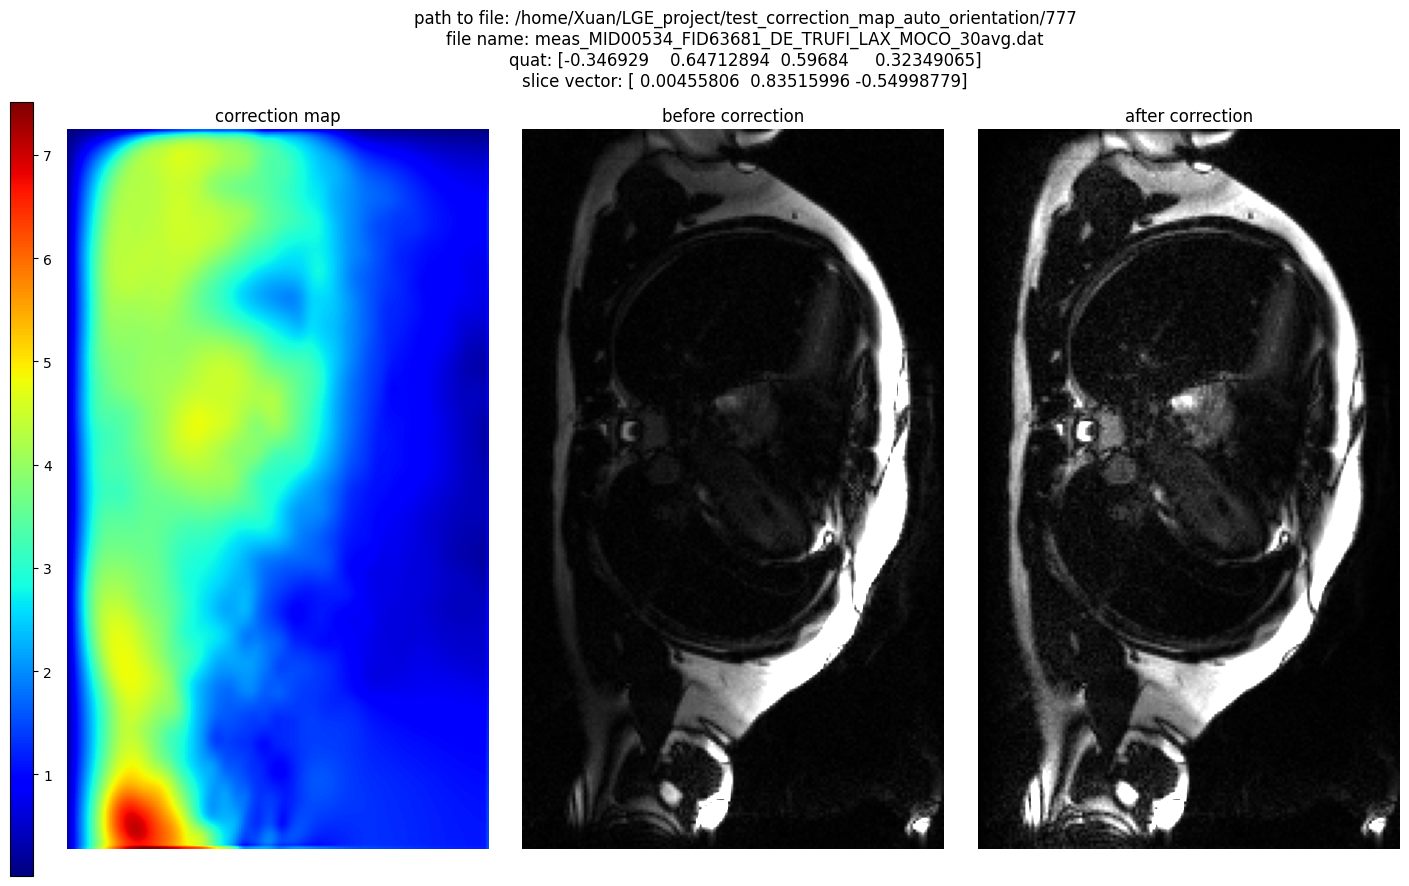

In [6]:
output_folder_names = ['777']
output_folder = "test_correction_map_auto_orientation"
displaying_results(base_dir=base_dir, input_folder=input_folder,
                   output_folder=output_folder, folder_names=output_folder_names, sli_idx=0, avg_idx=None, 
                   fig_h=9, debug=False) #set debug = True to display more information


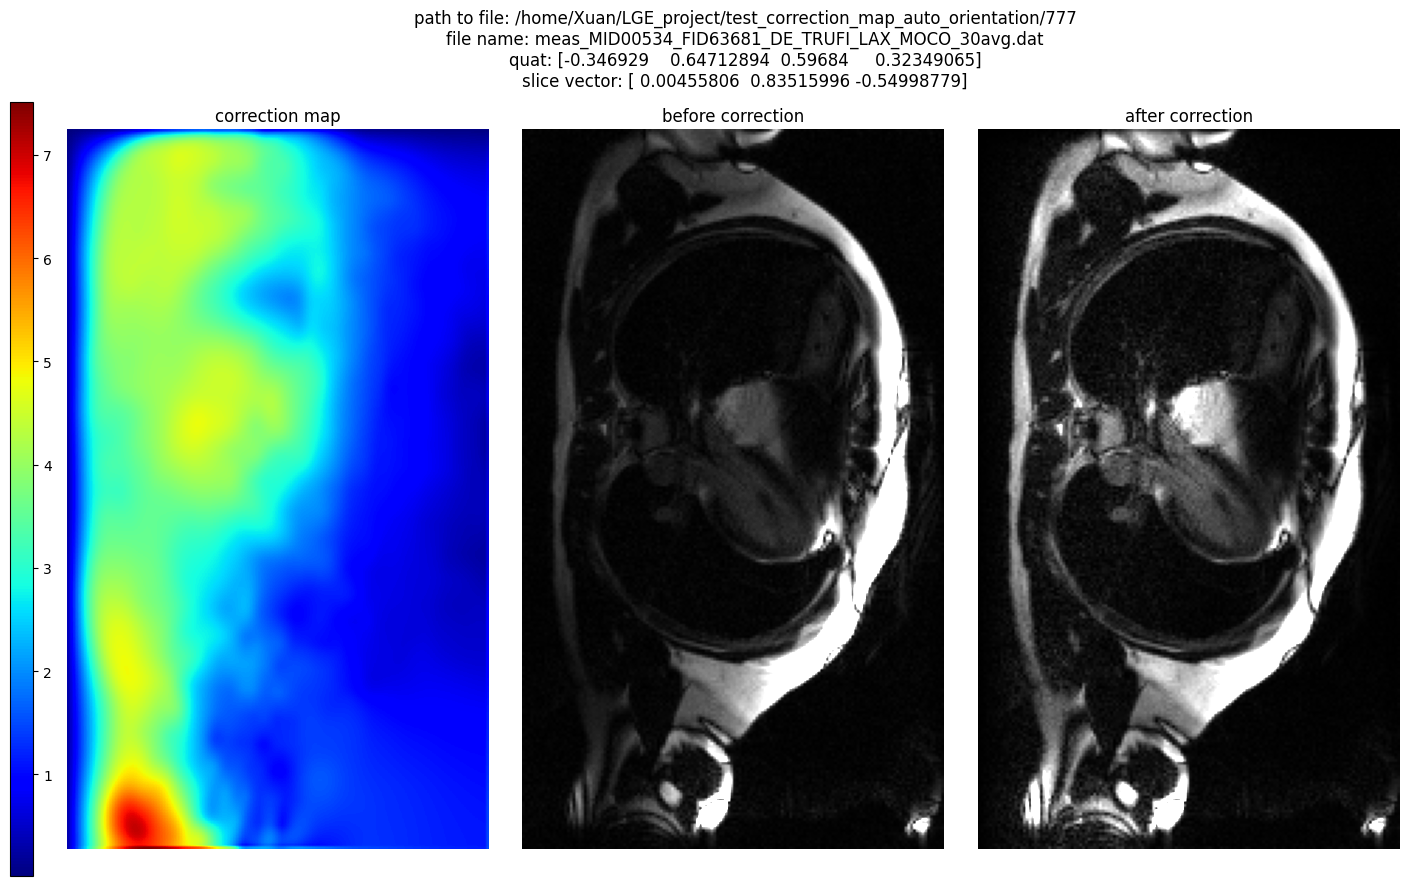

In [6]:
output_folder_names = ['777']
output_folder = "test_correction_map_auto_orientation"
displaying_results(base_dir=base_dir, input_folder=input_folder,
                   output_folder=output_folder, folder_names=output_folder_names, sli_idx=0, avg_idx=None, 
                   fig_h=9, debug=False) #set debug = True to display more information
